In [2]:
using CSV, DataFrames
using Plots,StatsPlots
using Statistics
using LsqFit
using SpecialFunctions

In [5]:
plot();

# Wczytanie danych i odrzucenie odstających

In [7]:
file=CSV.read("diamonds.csv", DataFrame);

In [8]:
file[:,:V]=file[:,:x] .* file[:,:y] .* file[:,:z];

In [60]:
α=0.3;

In [61]:
qpₘᵢₙ,qpₘₐₓ=quantile(file[:,:price], α),quantile(file[:,:price], 1-α);

In [62]:
qvₘᵢₙ,qvₘₐₓ=quantile(file[:,:V], α),quantile(file[:,:V], 01-α);

In [63]:
res=file[((file[:, :V].<qvₘₐₓ) .& (file[:, :V].>qvₘᵢₙ)) .& ((file[:, :price].<qpₘₐₓ) .& (file[:, :price].>qpₘᵢₙ)), [:V,:price]];

In [64]:
size(file), size(res)

((53940, 12), (18206, 2))

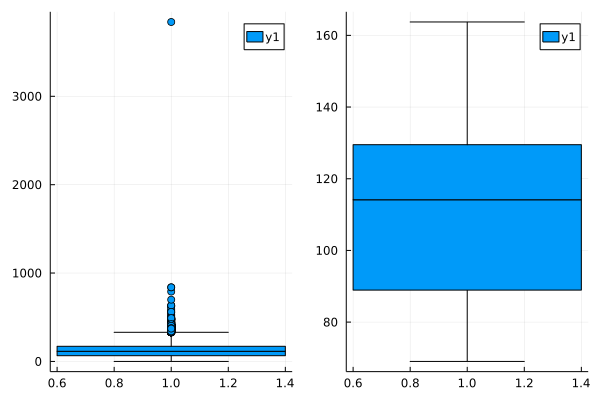

In [65]:
plot(boxplot(file[:, :V]),boxplot(res[:, :V]))

# Dopasowanie modelu

In [66]:
@. model(x,p)=p[1]+p[2]*x^p[3]

model (generic function with 1 method)

In [73]:
fit = curve_fit(model, res[:,:V], res[:,:price], [0.,1e2,1.2])

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Int64}}([-471.45699288322254, 9.938555110546972, 1.2064350337854846], [-139.97866015612453, 754.5785382955792, -244.66248726427466, -158.97195514586065, 182.2485084259456, -133.5121299841262, -287.72528487580894, 1025.676060680914, -68.17832537880986, 283.57640723210625  …  -152.01956118620728, -253.3059424000321, -212.47814222068428, -229.6407203626827, -129.5729346697981, -155.21876938634023, -85.03082102075314, -202.18315291234694, 656.1463230235336, 123.48828072466176], [0.9999999999557294 310.7572779355086 14691.893210669365; 0.9999999999557294 400.76605571753066 19787.08864069567; … ; 0.9999999999557294 390.86197870173584 19217.520251471902; 0.9999999999557294 337.2668598558836 16172.65097501955], true, Int64[])

In [74]:
fit.param

3-element Vector{Float64}:
 -471.45699288322254
    9.938555110546972
    1.2064350337854846